# Knapsack problem

<div>
<img src="attachment:image-2.png" width="250"/>
</div>

https://es.wikipedia.org/wiki/Problema_de_la_mochila

# Algoritmo genético (Algoritmos heurísticos)

<div>
<img src="attachment:image.png" width="500"/>
</div>

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

### 1. Haz una clase Item que sólo tenga atributos de instancia:
* Item = nombre de la clase
* id = Serà el id del objeto
* weight = el peso del objeto
* value = el valor del objeto

Esta clase simboliza un objeto con sus atributos.

In [21]:
class item():
    __ID = 0

    def __init__(self, weight, value):
        self.__id = self.__new_item()
        self.__weight = weight
        self.__value = value

    @classmethod
    def __new_item(cls):
        cls.__ID += 1
        return cls.__ID
    
    @classmethod
    def reiniciar_id(cls):
        cls.__ID = 0
    
    def get_id(self):
        return self.__id
    
    def get_weight(self):
        return self.__weight

    def get_value(self):
        return self.__value
    
    def set_weight(self, weight):
        self.__weight = weight

    def set_value(self, value):
        self.__value = value
    
    def __str__(self):
        return (f"Id: {self.get_id()}, Peso: {self.get_weight()}, Value: {self.get_value()}")

### 2. Declara un numero de productos (20) y haz 3 listas ( o numpy arrays):
* n = 20
* ids = con ids de 0 a $n$
* weights = con $n$ numeros aleatorios entre a y b (4,9)
* values = con $n$ numeros aleatorios entre c y d (10,30)

In [24]:
def lista_item(n, a,b , c,d):
    Lista_item = []

    def peso_random():
        return np.random.randint(a,b+1)
    
    def valor_random():
        return np.random.randint(c,d+1)

    for i in range(n):
        Lista_item.append(item(peso_random(), valor_random()))

    item.reiniciar_id()

    return Lista_item

In [26]:
def imprimir_lista_items(lista_items):
    for item in lista_items:
        print(item)

item_list = lista_item(20, 4,9, 10,30)
imprimir_lista_items(item_list)

Id: 1, Peso: 6, Value: 17
Id: 2, Peso: 8, Value: 14
Id: 3, Peso: 7, Value: 23
Id: 4, Peso: 5, Value: 23
Id: 5, Peso: 9, Value: 25
Id: 6, Peso: 6, Value: 11
Id: 7, Peso: 6, Value: 28
Id: 8, Peso: 5, Value: 19
Id: 9, Peso: 9, Value: 15
Id: 10, Peso: 7, Value: 22
Id: 11, Peso: 9, Value: 17
Id: 12, Peso: 8, Value: 14
Id: 13, Peso: 7, Value: 18
Id: 14, Peso: 8, Value: 29
Id: 15, Peso: 6, Value: 25
Id: 16, Peso: 4, Value: 11
Id: 17, Peso: 4, Value: 20
Id: 18, Peso: 8, Value: 21
Id: 19, Peso: 6, Value: 24
Id: 20, Peso: 5, Value: 27


### 3. declara una lista vacía y rellenala con los los objetos de la clase Item para cada Item
nombre de la lista = item_list

In [24]:
#es lo que he hecho en el anterior apartado

# Estos datos son los que determinan el problema (No tocar)

In [27]:
# Peso maximo de la mochila
carrier_limit = 40.0  # kg

# Parametros para el algoritmo genetico 
population_size = 10
generation_size = 100
mutation_rate = 0.1

#### Una solucion para un problema de 4 objetos seria de la forma: [0,1,0,1], donde los objetos con ids 1 y 3 entrarian a la mochila y el 0 y 2 no. Es un vector indicador de que objetos se han elegido para la mochila
#### Una solución es factible si la suma de los pesos de los objetos elegidos es menor que el peso máximo de la mochila

### 4. Crea una función que reciva la lista de items y devuelva una solución aleatoria al problema ( no tiene por que ser factible)

Nombre: create_random_solution

Nota: hay que utilizar funciones random que generen vectores aleatorios de 0 y 1

In [31]:
def random_solution(item_list):
    return np.random.randint(0,2, size=len(item_list)+1)

In [32]:
Sol1 = random_solution(item_list)
Sol1

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

### 5. Función que calcule el valor de una posible solución, esta función recive la lista de items y  una solución
#### Recive: lista de items y solución
Nombre: calculate_value
#### Devuelve: valor numerico de la solucion (suma de valores de los items)

304

### 6. Haz una función que reciva la lista de items, una solución y el peso màximo y te devuelva True si es una solución factible y False si no lo es
Nombre: valid_solution
#### Devuelve: True o False

In [29]:
def pesos_solution(item_list, l01):
    pesos = [item.get_weight() for item, flag in zip(item_list, l01) if flag == 1]


### 7. Función que mire si dos soluciones son iguales
#### Recive: solucion1 y solucion2
Nombre: check_duplicate_solutions

#### Devuelve: True or False

### 8. Función que genere una población inicial (conjunto de soluciones aleatorias inicial)
#### Recive: 
* pop_size = tamaño de la población (numero de soluciones)
* item_list = la lista de objetos items
* peso máximo

#### Devuelve una lista de soluciones

Nombre: initial_population

Nota: La función debe asegurarse que hay un pop_size de soluciones diferentes que sean validas. Las soluciones deben generarse de forma aleatoria

### 9. Función que escoja 2 soluciones de forma aleatoria y escoja la mejor

Tiene que generar 2 indices de forma aleatoria
#### Recive: 
* pop = población (conjunto de soluciones)
* item_list

#### Devuelve una solucion

Nombre: tournament_selection


### 10. Función que junta 2 soluciones de forma aleatoria (reproducción)
#### Recive: 
* 2 soluciones
* item_list
* carrier_limit

#### Devuelve una solucion

Nombre: crossover

Nota: Función recursiva. Hay que escojer un punto de corte de forma aleatoria ( es decir un indice y juntar por ese indice. Hay que mirar si la solución generada es valida, si no hay que volver a llamar la misma función


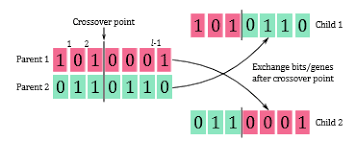

### 11. Función que muta una solución (escojera dos indices de forma aleatoria de la solución y pondrá 1 o 0 de forma aleatoria)
#### Recive: 
* 1 solucion
* item_list
* carrier_limit

#### Devuelve una solucion

Nombre: mutation

Nota: Función recursiva. Hay que escojer 2 indices y cambiar los valores de esa solucion. Hay que mirar si la solución generada es valida, si no hay que volver a llamar la misma función.


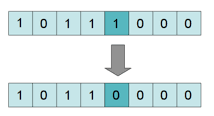


### 12. Función que genera $n$ nuevas soluciones a partir de las anteriores

Esta función empieza con una lista vacia, y va rellenandola de nuevas soluciones, para eso itera len(pop) veces:
1. Escoje 2 soluciones de la población de entrada de la función (como padres)
2. Junta con crossover estas dos soluciones
3. Se tira una moneda uniforme entre 0 y 1, si es mayor que mut_rate, se muta la solución anterior si no se omite el paso
4. Se añade a la lista de nuevas soluciones
#### Recive: 
* pop
* mut_rate
* item_list
* carrier_limit

#### Devuelve una nueva población (conjunto de soluciones)

Nombre: create_generation

Nota: 


[array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

### 13. Función que obtiene el valor de la mejor solución de una población

#### Recive: 
* pop
* item_list

#### Devuelve un valor

Nombre: best_solution

Nota: 


### 14. Algoritmo genetico

Esta función itera utilizando la función create_generation. 
* 1º incializa una población inicial
* 2º Inicializa dos listas vacias (1 para la mejor población de cada generación y otra para el valors asociado a esa solución)
* 3º Itera utilizando la función create_generation gen_size veces y creando generaciones de poblaciones a partir de la anterior y en cada iteración escoje la mejor solucion para guardar su información

#### Recive: 
* genetic_algorithm(carrier_limit, p_size, gen_size, mutation_rate, item_list)

#### Devuelve una lista con las mejores soluciones de cada generación y una lista de mejores resultados por generación

Nombre: genetic_algorithm

Nota: 


In [85]:
# latest population after genetic algorithm run
latest_pop, v_list = genetic_algorithm(carrier_limit=carrier_limit,
                                       p_size=population_size,
                                       gen_size=generation_size,
                                       mutation_rate=mutation_rate,
                                       item_list=item_list)

[0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0]
value -->  104
[0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  146
[0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0]
value -->  126
[1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0]
value -->  143
[0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0]
value -->  136
[0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  146
[0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0]
value -->  147
[0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  146
[0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  146
[0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  129
[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  154
[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  154
[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  154
[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  154
[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
value -->  154
[0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0]
value -->  156
[0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0]
value -->  156
[0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 

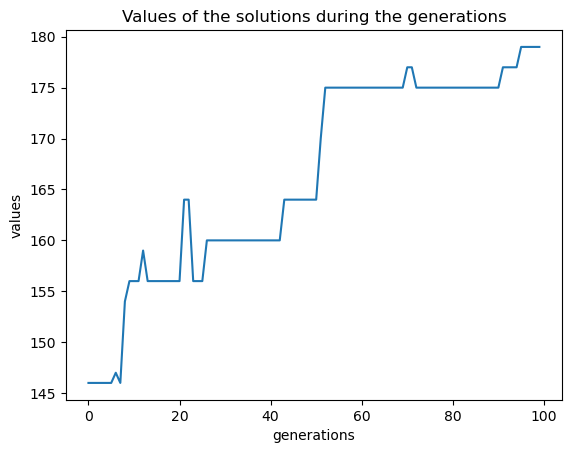

In [86]:
# Plot a graph to show the progress
plt.plot(v_list)
plt.xlabel('generations')
plt.ylabel('values')
plt.title("Values of the solutions during the generations")
plt.show()